In [32]:
# Dependencies
%matplotlib inline
import json
import requests
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#import seaborn as sns

import matplotlib.colors as colors
import operator
from pprint import pprint

In [33]:
path = "moviesapi_clean.csv"
df = pd.read_csv(path)
df.head()

,Title,Year,Rated,Runtime,Genre,Director,Writer,Language,Country,IMDB Rating,Revenue,Budget
0,Avatar,2009,PG-13,162 min,"Action, Adventure, Fantasy, Sci-Fi",James Cameron,James Cameron,"English, Spanish","UK, USA",7.8,2787965087,237000000
1,Pirates of the Caribbean: At World's End,2007,PG-13,169 min,"Action, Adventure, Fantasy",Gore Verbinski,"Ted Elliott, Terry Rossio, Ted Elliott (charac...","Mandarin, English",USA,7.1,961000000,300000000
2,Spectre,2015,PG-13,148 min,"Action, Adventure, Thriller",Sam Mendes,"John Logan (screenplay by), Neal Purvis (scree...","English, Spanish, Italian, German, French","UK, USA",6.8,880674609,245000000
3,The Dark Knight Rises,2012,PG-13,164 min,"Action, Thriller",Christopher Nolan,"Jonathan Nolan (screenplay), Christopher Nolan...","English, Arabic","UK, USA",8.4,1084939099,250000000
4,John Carter,2012,PG-13,132 min,"Action, Adventure, Sci-Fi",Andrew Stanton,"Andrew Stanton (screenplay by), Mark Andrews (...",English,USA,6.6,284139100,260000000


In [34]:
# Create the bins in which Data will be held
# Bins are 0, 59, 69, 79, 89, 100.   
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990, 2000,2010, 2020]

# Create the names for the four bins
group_names = ["1900-10","1910-20","1920-30","1930-40", "1940-50", "1950-60","1960-70", "1970-80", "1980-90", "1990-2000", "2000-2010","2010-2020"]

In [35]:
df["Decade"] = pd.cut(df["Year"], bins, labels=group_names)
df["Decade"].head()

0    2000-2010
1    2000-2010
2    2010-2020
3    2010-2020
4    2010-2020
Name: Decade, dtype: category
Categories (12, object): [1900-10 < 1910-20 < 1920-30 < 1930-40 ... 1980-90 < 1990-2000 < 2000-2010 < 2010-2020]

In [36]:
bin_df2 = df.groupby("Decade")

bin_df2.max()

,Title,Year,Runtime,Genre,Country,IMDB Rating,Revenue,Budget
Decade,,,,,,,,
1900-10,The Country Doctor,1909,14 min,"Short, Drama",USA,6.5,0,0
1910-20,The Birth of a Nation,1915,195 min,"Drama, History, War",USA,6.6,15861566,8500000
1920-30,The Kid,1930,68 min,"Short, Comedy",USA,8.3,69700000,92620000
1930-40,Wuthering Heights,1940,95 min,"Fantasy, Horror",USA,8.5,400176459,40000000
1940-50,Tycoon,1950,97 min,Western,USA,8.6,267447150,6000000
1950-60,Trapeze,1960,99 min,"Horror, Mystery, Thriller","USA, France",8.9,94061311,100000000
1960-70,Zulu,1970,99 min,Western,West Germany,8.8,286214286,45000000
1970-80,Young Frankenstein,1980,99 min,Thriller,"USA, UK, Canada, Switzerland",9.2,470654000,55000000
1980-90,Young Sherlock Holmes,1990,99 min,Western,"West Germany, USA",8.5,792910554,144000000


In [37]:
year_group = df.groupby('Decade')

# Count how many times each maker appears in our group
count_year = year_group['Decade'].count()

count_year

Decade
1900-10         1
1910-20         1
1920-30         7
1930-40        21
1940-50        24
1950-60        35
1960-70        78
1970-80       120
1980-90       277
1990-2000     893
2000-2010    1993
2010-2020    1132
Name: Decade, dtype: int64

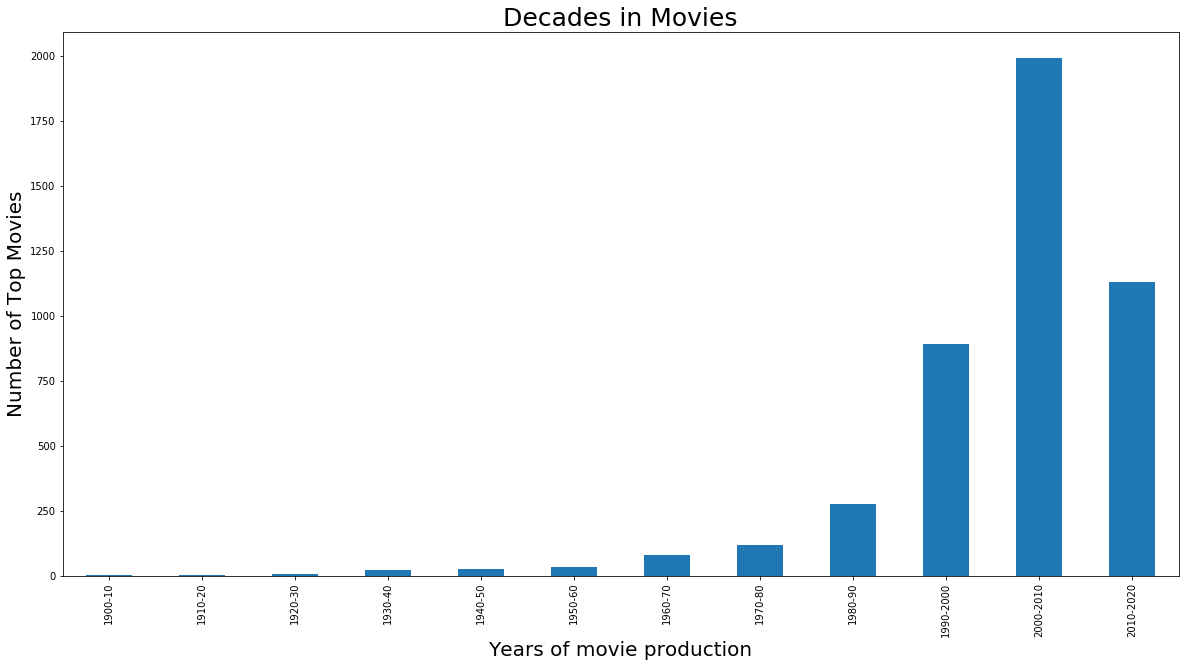

<Figure size 432x288 with 0 Axes>

In [38]:
#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
colors_list = list(colors._colors_full_map.values())
color_counter = 25
count_chart = count_year.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Years of movie production", fontsize=20)
count_chart.set_ylabel("Number of Top Movies", fontsize=20)

plt.title("Decades in Movies", fontsize=25)
plt.legend
plt.show()
plt.tight_layout()

In [39]:
bin_max=bin_df2 ["Revenue","Budget"]
bin=bin_max.max()
bin

,Revenue,Budget
Decade,,
1900-10,0,0
1910-20,15861566,8500000
1920-30,69700000,92620000
1930-40,400176459,40000000
1940-50,267447150,6000000
1950-60,94061311,100000000
1960-70,286214286,45000000
1970-80,470654000,55000000
1980-90,792910554,144000000


In [42]:
year_sum = df.groupby('Decade')
count_year1 = year_group ["Revenue"].mean()
count_year1
#bin_max=bin_df2 ["Revenue"]
#bin=bin_max.sum()
#t=bin_df2.agg({"Revenue": "sum"})




Decade
1900-10      0.000000e+00
1910-20      1.586157e+07
1920-30      1.495835e+07
1930-40      5.021574e+07
1940-50      1.741495e+07
1950-60      1.582725e+07
1960-70      3.051928e+07
1970-80      5.197838e+07
1980-90      7.228688e+07
1990-2000    7.621092e+07
2000-2010    8.055655e+07
2010-2020    1.124209e+08
Name: Revenue, dtype: float64

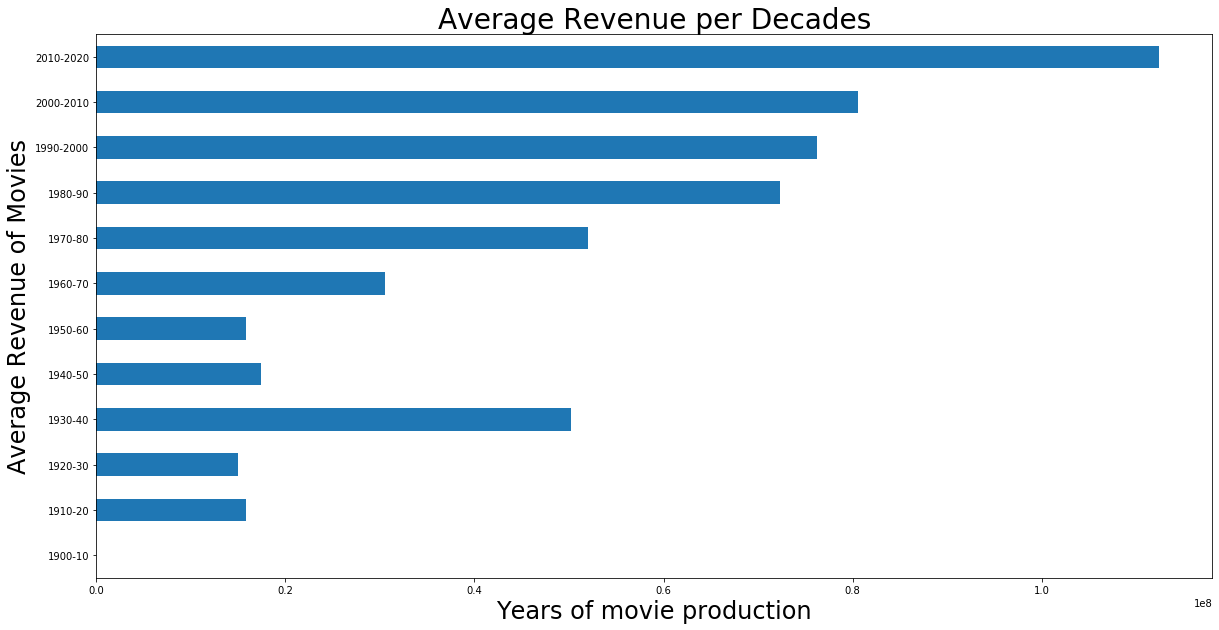

<Figure size 432x288 with 0 Axes>

In [43]:
#count_chart2 = count_year1.plot(kind='barh')

# Set the xlabel and ylabel using class methods
#count_chart2.set_xlabel("Revenue in Billions")
#count_chart2.set_ylabel("Decades")


#Plot Bar Graph
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
colors_list = list(colors._colors_full_map.values())
color_counter = 25
count_chart2 = count_year1.plot(kind='barh')

# Set the xlabel and ylabel using class methods
count_chart2.set_xlabel("Years of movie production", fontsize=24)
count_chart2.set_ylabel("Average Revenue of Movies", fontsize=24)

plt.title("Average Revenue per Decades", fontsize=28)
plt.legend
plt.show()
plt.tight_layout()

